In [1]:
import torch
import torch.nn.functional as F
import time

In [6]:
print(torch.tensor(data=[[6, 8], [10, 12]]))

tensor([[ 6,  8],
        [10, 12]])


In [57]:
import torch
import torch.nn.functional as F
import time

x = torch.empty(1_000_000_000)


# ReLU
start = time.time()
for _ in range(100): y = F.relu(x)
print("ReLU:", time.time() - start)

# Approx GELU (default)
start = time.time()
for _ in range(100): y = F.gelu(x)  # default: tanh
print("Approx GELU:", time.time() - start)

# Exact GELU
start = time.time()
for _ in range(100): y = F.gelu(x, approximate='none')
print("Exact GELU:", time.time() - start)


ReLU: 21.551164865493774
Approx GELU: 25.17215633392334
Exact GELU: 25.36975646018982


In [51]:
import numpy as np
from scipy.special import erf

def gelu_exact(x):
    """Exact GELU using erf"""
    return 0.5 * x * (1 + erf(x / np.sqrt(2)))

def gelu_approx(x):
    """Approximate GELU using tanh"""
    # print(x + 0.044715 * x**3)
    # print(np.sqrt(2/np.pi))
    # print(np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

# Example input values
x_values = np.array([1])

# Compute both
exact = gelu_exact(x_values)
approx = gelu_approx(x_values)

# Print table of results
print(f"{'x':>6} | {'Exact GELU':>12} | {'Approx GELU':>12} | Diff")
print("-" * 45)
for x, e, a in zip(x_values, exact, approx):
    print(f"{x:6.2f} | {e:12.6f} | {a:12.6f} | {abs(e-a):.6f}")


     x |   Exact GELU |  Approx GELU | Diff
---------------------------------------------
  1.00 |     0.841345 |     0.841192 | 0.000153


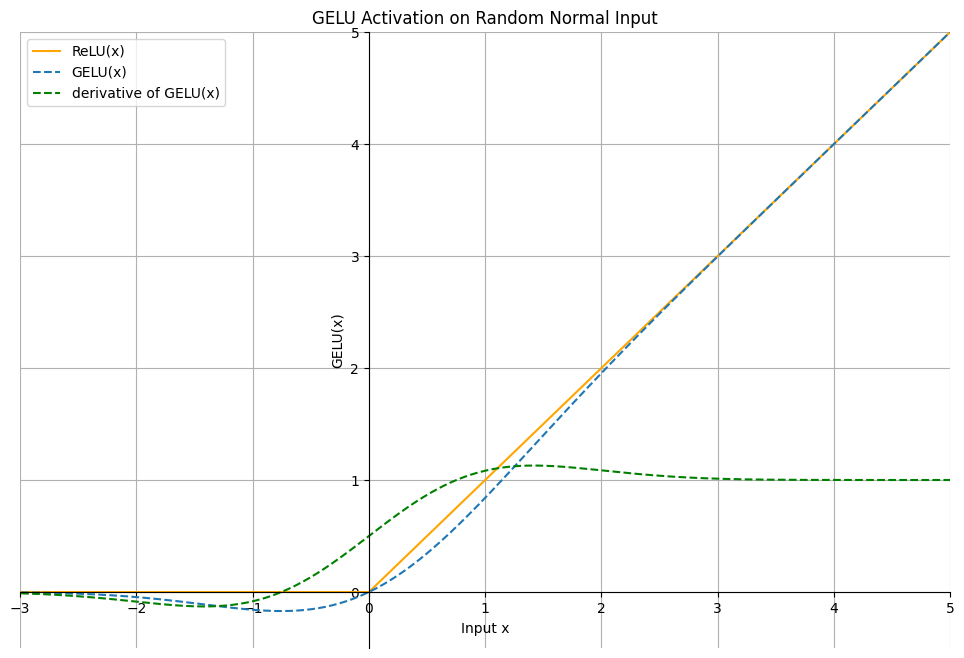

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# GELU activation function
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

def relu(x):
    return np.maximum(0,x)

def d_gelu(x):
    sqrt_2_over_pi = np.sqrt(2.0 / np.pi)
    x_cubed = x ** 3
    tanh_arg = sqrt_2_over_pi * (x + 0.044715 * x_cubed)
    tanh_out = np.tanh(tanh_arg)
    left = 0.5 * (1 + tanh_out)
    sech_squared = 1 - tanh_out ** 2
    right = 0.5 * x * sech_squared * sqrt_2_over_pi * (1 + 3 * 0.044715 * x**2)
    return left + right


# Generate random inputs from normal distribution
# x_vals = np.random.randn(5000)
x_vals = np.linspace(-5, 10, 1000)
x_vals.sort()  # optional: for smoother curve

# Apply GELU
gelu_vals = gelu(x_vals)
relu_vals = relu(x_vals)
d_gelu_vals = d_gelu(x_vals)

# Plot
plt.figure(figsize=(12,8))
plt.plot(x_vals, relu_vals, label='ReLU(x)', color='orange')
plt.plot(x_vals, gelu_vals, '--', alpha=1, label='GELU(x)')
plt.plot(x_vals, d_gelu_vals, '--', label='derivative of GELU(x)', color='green')

# Center axes at origin
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Optional: add arrows to axes

# Ticks only on bottom and left
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.xlim(-3, 5)
plt.ylim(-0.5, 5)

plt.title('GELU Activation on Random Normal Input')
plt.xlabel('Input x')
plt.ylabel('GELU(x)')
plt.grid(True)
plt.legend()
plt.show()


In [15]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Exact GELU using erf
# def gelu(x):
#     # return 0.5 * x * (1 + np.erf(x / np.sqrt(2)))
#     return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))


# # ReLU
# def relu(x):
#     return np.maximum(0, x)

# # Define input range
# x = np.linspace(-5, 6, 500)
# y_gelu = gelu(x)
# y_relu = relu(x)
# difference = y_gelu - y_relu

# # Define convergence threshold
# epsilon = 0.01

# # Find point where GELU becomes close to ReLU
# converge_indices = np.where(np.abs(difference) < epsilon)[0]
# if len(converge_indices) > 0:
#     x_converge = x[converge_indices[0]]
#     print(f"GELU(x) ≈ ReLU(x) when x ≈ {x_converge:.3f} (|GELU - ReLU| < {epsilon})")
# else:
#     print("No convergence point found within given range and epsilon.")

# # ------------------- PLOT 1: Activation Functions -------------------
# plt.figure(figsize=(8, 5))
# plt.plot(x, y_gelu, label='GELU (exact)', linewidth=2)
# plt.plot(x, y_relu, label='ReLU', linestyle='--')
# plt.axvline(x_converge, color='gray', linestyle=':', label=f'Converges at x ≈ {x_converge:.2f}')
# plt.title("GELU vs ReLU")
# plt.xlabel("Input x")
# plt.ylabel("Activation")
# plt.grid(True, linestyle='--', alpha=0.3)
# plt.legend()
# plt.tight_layout()
# plt.show()

# # ------------------- PLOT 2: Difference Curve -------------------
# plt.figure(figsize=(8, 5))
# plt.plot(x, difference, label="GELU(x) - ReLU(x)")
# plt.axhline(epsilon, color='r', linestyle='--', label=f'+ε = {epsilon}')
# plt.axhline(-epsilon, color='r', linestyle='--', label=f'-ε = {epsilon}')
# plt.axvline(x_converge, color='gray', linestyle=':', label=f'Converges at x ≈ {x_converge:.2f}')
# plt.title("Difference Between GELU and ReLU")
# plt.xlabel("Input x")
# plt.ylabel("GELU(x) - ReLU(x)")
# plt.grid(True, linestyle='--', alpha=0.3)
# plt.legend()
# plt.tight_layout()
# plt.show()
